In [39]:
import pandas as pd

In [40]:
df= pd.read_csv('breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [41]:
X=df.iloc[:,:-1]
Y=df.outcome

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=13)

In [43]:
X_train.shape

(455, 30)

In [44]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)

PCA()

In [45]:
pca.explained_variance_ratio_

array([9.81539144e-01, 1.65591580e-02, 1.68556966e-03, 1.20682485e-04,
       8.35320344e-05, 6.54847528e-06, 3.88578192e-06, 8.30243117e-07,
       3.46670516e-07, 1.95370971e-07, 7.20493698e-08, 1.66265497e-08,
       7.07935235e-09, 4.84033269e-09, 2.96871113e-09, 1.35326769e-09,
       8.28830965e-10, 5.17353263e-10, 4.17649687e-10, 3.42189196e-10,
       1.69200109e-10, 1.20317018e-10, 7.39280190e-11, 6.09960617e-11,
       3.57324642e-11, 2.73190470e-11, 8.35856265e-12, 5.70976053e-12,
       4.51692088e-12, 1.36890922e-12])

In [46]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

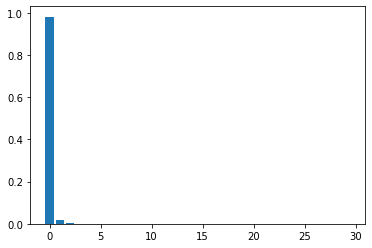

In [47]:
plt.bar(range(30),pca.explained_variance_ratio_)

In [48]:
X_train_pca=pca.fit_transform(X_train)

# Convert Train Data into PCA

In [49]:
X_train_pca=pd.DataFrame(X_train_pca)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,477.038901,130.841088,3.989202,0.852415,1.229268,-1.576083,-1.454333,-0.087534,-0.299527,0.148390,...,-0.005759,-0.001959,-0.013499,0.001125,-0.003545,-0.004135,-0.003298,0.000277,-0.000749,-0.001312
1,-637.857677,-11.912535,3.559561,6.180113,2.597992,0.564718,0.071505,-0.243694,0.500968,-0.095942,...,-0.006747,0.004876,-0.008739,0.007457,-0.001662,0.004301,-0.000178,0.000387,-0.001136,0.000455
2,663.800296,98.794331,11.174244,-1.213576,-0.238491,-0.389240,0.940367,0.740971,-0.480790,0.040298,...,-0.008515,0.004103,0.003018,0.006018,0.002120,0.001670,0.001949,-0.000071,0.000470,-0.000400
3,-505.617852,-6.678776,6.470111,3.514982,3.539381,-0.454282,-0.667699,-0.159852,-0.097296,-0.322761,...,-0.005536,-0.004806,-0.001655,0.006165,-0.002498,0.005764,-0.000196,0.001335,0.000149,0.000617
4,-490.436939,0.752634,2.770829,4.483284,-2.760795,-1.088699,-0.492599,-0.239475,0.214826,-0.250308,...,0.008573,-0.013889,0.003149,-0.002532,-0.001772,-0.001106,-0.000248,0.001772,-0.001360,0.000108


In [50]:
sum(pca.explained_variance_ratio_[:4])# First four columns contains majorty of data

0.9999045538927516

In [51]:
X_train_pca=X_train_pca.iloc[:,:4]

In [52]:
X_train_pca.head()

,0,1,2,3
0,477.038901,130.841088,3.989202,0.852415
1,-637.857677,-11.912535,3.559561,6.180113
2,663.800296,98.794331,11.174244,-1.213576
3,-505.617852,-6.678776,6.470111,3.514982
4,-490.436939,0.752634,2.770829,4.483284


In [53]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
215,13.86,16.93,90.96,578.9,0.10260,0.15170,0.099010,0.05602,0.2106,0.06916,...,15.75,26.93,104.40,750.1,0.1460,0.43700,0.46360,0.16540,0.3630,0.10590
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553
419,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,12.36,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123
44,13.17,21.81,85.42,531.5,0.09714,0.10470,0.082590,0.05252,0.1746,0.06177,...,16.23,29.89,105.50,740.7,0.1503,0.39040,0.37280,0.16070,0.3693,0.09618
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.023990,0.02173,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994


# Convert Test Data into PCA

In [54]:
X_test_pca=pd.DataFrame(pca.fit_transform(X_test))
X_test_pca=X_test_pca.iloc[:,:4]
X_test_pca.head()

,0,1,2,3
0,-93.200469,-8.077804,-7.265206,-5.179786
1,-261.492458,-16.616418,-3.674015,1.745180
2,-446.190589,24.539307,0.588015,-1.474799
3,-124.987791,27.660000,-19.333145,-9.069354
4,-437.448993,11.239924,0.860141,1.019618


# Supervised ML
- Not part of PCA


In [55]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train_pca,Y_train)

RandomForestClassifier()

In [56]:
Y_predict=model.predict(X_test_pca)

In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
accuracy_score(Y_test, Y_predict)

0.8421052631578947

In [29]:
pd.crosstab(Y_test, Y_predict)

col_0,0,1
outcome,,
0,71,7
1,2,34


In [30]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        78
           1       0.83      0.94      0.88        36

    accuracy                           0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114

